# Exploratory Analysis (Example - using BaseMap)

In [ ]:
# reference - https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

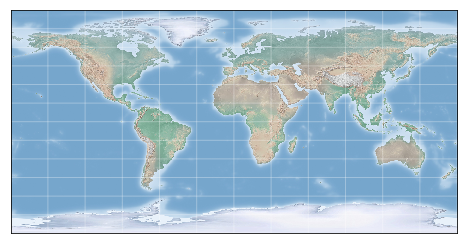

In [4]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

# Exploratory Analysis - Satellite Imagery Project

In [1]:
import pandas as pd

In [ ]:
data = pd.read_csv('output/data_150_projects_with_valid_countries.csv')

In [ ]:
selected_data = [5405, 5397, 5011, 3685, 5021, 5370, 5027, 3995, 3994, 3992, 3991, 3697, 3649, 5303]

In [9]:
lon_selected = data.loc[data['id'].isin(selected_data)]['coord_1'].values
lat_selected = data.loc[data['id'].isin(selected_data)]['coord_2'].values

In [12]:
# Extract the data we're interested in
lon = data['coord_1'].values
lat = data['coord_2'].values

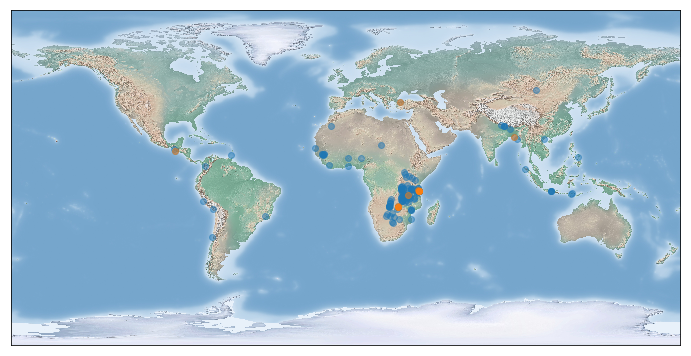

In [14]:
# 1. Draw the map background
fig = plt.figure(figsize=(12, 12))
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
m.shadedrelief()

# 2. scatter project data, with blue color reflecting 
# the presence of validated map data
m.scatter(lon, lat, latlon=True,
          cmap='Reds', alpha=0.5)

# 3. scatter selected project data, with red color reflecting 
# the presence of downloaded and trained data
m.scatter(lon_selected, lat_selected, latlon=True,
          cmap='Blues', alpha=0.5)